## Gravitational Orbits
Solve and plot the orbot of a two body system

In [1]:
# Imports

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import Image
from IPython.display import HTML

In [2]:
# Class
class GravitationalOrbits():
    
    """
    Solves for Gravitational Orbits
    
    Parameters:
        m_n = mass of body
        G = Gravitational Potential
        
    Method:
        dz_dt(t,z): solves DiffEQ given t and z
    """
    
    def __init__(self, m_1=1., m_2=1., G=1. ):
        self.m_1 = m_1
        self.m_2 = m_2
        self.G = G
        
    def dz_dt(self, t, z):
        r_12 = np.sqrt( (z[0] - z[4])**2 + (z[2]-z[6])**2 )
        
        return [ z[1], self.G * self.m_2 * (z[4] - z[0]) / r_12**3, \
                 z[3], self.G * self.m_2 * (z[6] - z[2]) / r_12**3, \
                 z[5], -self.G * self.m_1 * (z[4] - z[0]) / r_12**3, \
                 z[7], -self.G * self.m_1 * (z[6] - z[2]) / r_12**3 ]
    
    def solve_ode(self, t_pts, z_0, abserr=1.0e-8, relerr=1.0e-8):
        solution = solve_ivp(self.dz_dt, (t_pts[0], t_pts[-1]), z_0, t_eval=t_pts, method='RK23', atol=abserr, rtol=relerr)
        
        x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = solution.y
        
        return x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2
    
    def solve_ode_Leapfrog(self, t_pts, z_0):
        
        delta_t = t_pts[1] - t_pts[0]
        
        x_1_0, x_dot_1_0, y_1_0, y_dot_1_0, x_2_0, x_dot_2_0, y_2_0, y_dot_2_0 = z_0
        
        # intialize arrays
        num_t_pts = len(t_pts)
        
        x_1 = np.zeros(num_t_pts)
        x_dot_1 = np.zeros(num_t_pts)
        x_dot_1_half = np.zeros(num_t_pts)
        
        y_1 = np.zeros(num_t_pts)
        y_dot_1 = np.zeros(num_t_pts)
        y_dot_1_half = np.zeros(num_t_pts)
        
        x_2 = np.zeros(num_t_pts)
        x_dot_2 = np.zeros(num_t_pts)
        x_dot_2_half = np.zeros(num_t_pts)
        
        y_2 = np.zeros(num_t_pts)
        y_dot_2 = np.zeros(num_t_pts)
        y_dot_2_half = np.zeros(num_t_pts)
        
        # initial conditions
        x_1[0] = x_1_0
        x_dot_1[0] = x_dot_1_0
        
        y_1[0] = y_1_0
        y_dot_1[0] = y_dot_1_0
        
        x_2[0] = x_2_0
        x_dot_2[0] = x_dot_2_0
        
        y_2[0] = y_2_0
        y_dot_2[0] = y_dot_2_0
        
        # Differential Equation
        for i in np.arange(num_t_pts - 1):
            t = t_pts[i]
            
            z = [x_1[i], x_dot_1[i], y_1[i], y_dot_1[i], x_2[i], x_dot_2[i], y_2[i], y_dot_2[i]]
            
            out = self.dz_dt(t,z)
            
            x_dot_1_half[i] = x_dot_1[i] + out[1] * delta_t/2.
            x_1[i+1] = x_1[i] + x_dot_1_half[i] * delta_t
            
            y_dot_1_half[i] = y_dot_1[i] + out[3] * delta_t/2.
            y_1[i+1] = y_1[i] + y_dot_1_half[i] * delta_t
            
            x_dot_2_half[i] = x_dot_2[i] + out[5] * delta_t/2.
            x_2[i+1] = x_2[i] + x_dot_2_half[i] * delta_t
            
            y_dot_2_half[i] = y_dot_2[i] + out[7] * delta_t/2.
            y_2[i+1] = y_2[i] + y_dot_2_half[i] * delta_t
            
            z = [x_1[i+1], x_dot_1[i], y_1[i+1], y_dot_1[i], x_2[i+1], x_dot_2[i], y_2[i+1], y_dot_2[i]]
            
            out = self.dz_dt(t,z)
            
            x_dot_1[i+1] = x_dot_1_half[i] + out[1] * delta_t/2.
            y_dot_1[i+1] = y_dot_1_half[i] + out[3] * delta_t/2.
            x_dot_2[i+1] = x_dot_2_half[i] + out[5] * delta_t/2.
            y_dot_2[i+1] = y_dot_2_half[i] + out[7] * delta_t/2.
            
        return x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2
    
    def solve_ode_Leapfrog_n(self, t_pts, z_0):
            
        delta_t = t_pts[1] - t_pts[0]
            
        # zero arrays
        num_t_pts = len(t_pts)
        n_tot = len(z_0)
        z = np.zeros( shape=(n_tot, num_t_pts) )
        dot_half = np.zeros( int(n_tot/2) )
            
        z[:,0] = z_0
            
        # Diff EQ
        for i in np.arange(num_t_pts -1):
            t = t_pts[i]
            
            z_now = z[:,i]
            
            out = np.asarray( self.dz_dt(t, z_now) )
            
            dot_half = z_now[1::2] + out[1::2] * delta_t/2.
            
            z[0::2, i+1] = z_now[0::2] + dot_half * delta_t
            
            z_now[0::2] = z[0::2, i+1]
            
            out = np.asarray( self.dz_dt(t, z_now) )
            
            z[1::2, i+1] = dot_half + out[1::2] * delta_t/2.
        return z
            

In [3]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, color=None, linestyle=None, semilogy=False, loglog=False, ax=None):
    
    if ax is None:
        ax = plt.gca()
        
    if (semilogy):
        line, = ax.semilogy(x, y, label=label, color=color, linestyle=linestyle)
        
    elif (loglog):
        line, = ax.loglog(x, y, label=label, color=color, linestyle=linestyle)
        
    else: 
        line, = ax.plot(x, y, label=label, color=color, linestyle=linestyle)
        
    if label is not None:
        ax.legend()
        
    if title is not None:
        ax.set_title(title)
    
    if axis_labels is not None:
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])
        
    return ax, line

In [4]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    
    start_index = (np.fabs(t_pts-plot_start)).argmin()
    
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()
    
    return start_index, stop_index

## Make Plots


In [5]:
# Label plot axes
orbit_labels = (r'$x$', r'$y$')

# Plotting time
t_start = 0.
t_end = 50.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)

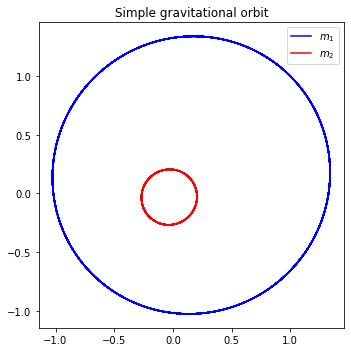

In [6]:
# Plotting time
t_start = 0.
t_end = 50.
delta_t = 0.01

G = 1.
m_1 = 1.
m_2 = 5.

o1 = GravitationalOrbits(m_1, m_2, G)

# Initial Conditions
x_1_0, x_dot_1_0 = 1., -1.
y_1_0, y_dot_1_0 = 1., 1.
x_2_0, x_dot_2_0 = -(m_1 / m_2) * x_1_0, -(m_1 / m_2) * x_dot_1_0
y_2_0, y_dot_2_0 = -(m_1 / m_2) * y_1_0, -(m_1 / m_2) * y_dot_1_0

z_0 = [x_1_0, x_dot_1_0, y_1_0, y_dot_1_0, x_2_0, x_dot_2_0, y_2_0, y_dot_2_0]

x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = o1.solve_ode(t_pts, z_0)

# Start plot

fig = plt.figure(figsize=(5,5))

# orbit

ax = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)
ax.plot(x_1, y_1, color='blue', label=r'$m_1$')
ax.plot(x_2, y_2, color='red', label=r'$m_2$')
ax.set_title('Simple gravitational orbit')
ax.legend()
ax.set_aspect(1)



fig.tight_layout()
fig.savefig('simple_orbits.png', bbox_inches='tight')


Here we can see the orbital path of this two body system. From this we can clearly see how each body is affecting the path of the other due to their similar mass size. 

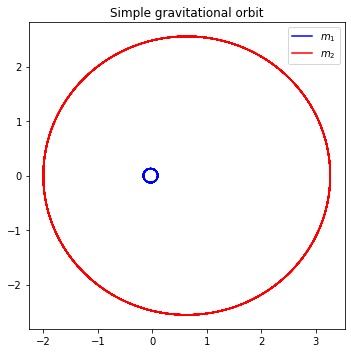

In [7]:
# Plotting time
t_start = 0.
t_end = 20.
delta_t = 0.00001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)

G = 20.
m_1 = 20.
m_2 = 1.

o1 = GravitationalOrbits(m_1, m_2, G)

# Initial Conditions
x_1_0, x_dot_1_0 = 0.1, 0.
y_1_0, y_dot_1_0 = 0., 0.75
x_2_0, x_dot_2_0 = -(m_1 / m_2) * x_1_0, -(m_1 / m_2) * x_dot_1_0
y_2_0, y_dot_2_0 = -(m_1 / m_2) * y_1_0, -(m_1 / m_2) * y_dot_1_0

z_0 = [x_1_0, x_dot_1_0, y_1_0, y_dot_1_0, x_2_0, x_dot_2_0, y_2_0, y_dot_2_0]

x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = o1.solve_ode_Leapfrog(t_pts, z_0)

# Start plot

fig = plt.figure(figsize=(5,5))

# orbit

ax = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)
ax.plot(x_1, y_1, color='blue', label=r'$m_1$')
ax.plot(x_2, y_2, color='red', label=r'$m_2$')
ax.set_title('Simple gravitational orbit')
ax.legend()
ax.set_aspect(1)



fig.tight_layout()
fig.savefig('simple_orbits_Leapfrog.png', bbox_inches='tight')


Here we can see that once one of the objects becomes signifigantly larger than the other, the larger object begins to move much less compared to its compantion, resembing a more traditional orbit. 

## Animation


In [42]:
# Plotting time
t_start = 0.
t_end = 50.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)

G = 20.
m_1 = 20.
m_2 = 1.

o1 = GravitationalOrbits(m_1, m_2, G)

# Initial Conditions
x_1_0, x_dot_1_0 = .1, 0.
y_1_0, y_dot_1_0 = 0., .75
x_2_0, x_dot_2_0 = -(m_1 / m_2) * x_1_0, -(m_1 / m_2) * x_dot_1_0
y_2_0, y_dot_2_0 = -(m_1 / m_2) * y_1_0, -(m_1 / m_2) * y_dot_1_0

z_0 = [x_1_0, x_dot_1_0, y_1_0, y_dot_1_0, x_2_0, x_dot_2_0, y_2_0, y_dot_2_0]

x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = o1.solve_ode(t_pts, z_0)

In [47]:
%%capture
x_min = -5.
x_max = -x_min
y_min = -5.
y_max = -y_min


fig_anim = plt.figure(figsize=(5,5), num='Gravitational Orbits')
ax_anim = fig_anim.add_subplot(1,1,1)
ax_anim.set_xlim(x_min, x_max)
ax_anim.set_ylim(y_min, y_max)

ln1_anim, = ax_anim.plot(x_1, y_1, color='blue', lw=1)
ln2_anim, = ax_anim.plot(x_2, y_2, color='red', lw=1)

pt1_anim, = ax_anim.plot(x_1[0], y_1[0], 'o', markersize=8, color='blue')
pt2_anim, = ax_anim.plot(x_2[0], y_2[0], 'o', markersize=8, color='red')

ax_anim.set_aspect(1)
ax_anim.axis('off')
fig_anim.tight_layout()


In [48]:
def animate_orbits(i):
    """

    """
    i_skip = 1 * i

    pt1_anim.set_data(x_1[i_skip], y_1[i_skip])
    pt2_anim.set_data(x_2[i_skip], y_2[i_skip])

    return (pt1_anim, pt2_anim)


In [49]:
frame_interval = 10. 
frame_number = 1001 
anim = animation.FuncAnimation(fig_anim, animate_orbits, init_func=None, frames=frame_number, interval=frame_interval, blit=True, repeat=False)



In [50]:
HTML(anim.to_jshtml())

Here we can see our previous plot in motion and observe how the speed changes as the objects move in their orbit. We can see in the other orbit that the mass moves faster when closest to the other mass and slower when further away